### [Python Packages and Modules]

#### Module
* A module is simply an organizational unit of Python code.
* Modules are loaded into Python by importing.
* A modoule also creates a namesplace when you input it.

#### Package
* It is a module that can contain other modules or packages.
* It is wrong to say **a module is basically a single Python file whereas a package is a folder full of a bunch or Python files.**


### [Importing Your Own Code]

In [ ]:
"""
Example of importing my own modules.
"""

import random
import examples3_utils as utils

def most_ones(seq0, seq1):
    """
    Determine which sequence has more number 1's in it.
    Returns 0 if it is seq0 and 1 if it is seq1.
    """
    cnt0 = len(utils.indices(seq0, 1))
    cnt1 = len(utils.indices(seq1, 1))
    if cnt0 >= cnt1:
        return 0
    else:
        return 1

print(most_ones(range(42), [0, 1, 2, 3, 2, 1, 0]))
print(most_ones([1] * 5, [1, 2, 1, 2, 1, 2, 1]))

def random_unique(minnum, maxnum):
    """
    Return a list with random values between minnum and
    maxnum with no duplicates.
    """
    lst = [random.randint(minnum, maxnum) for num in range(50)]
    result = utils.remove_dups(lst)
    return result

print(random_unique(0, 5))
print(random_unique(-3, 14))

### [Line Plots with Pygal]

* How to create a conventional line plot and an xy scatter plot.

In [ ]:
!pip install pygal

     |████████████████████████████████| 127 kB 8.4 MB/s 


In [ ]:
"""
Example of drawing line plots with Pygal.
"""

import pygal

def draw_line(title, xvals, yvals):
    """
    Draw line plot with given x and y values.
    """
    lineplot = pygal.Line(height=400)
    lineplot.title = title
    lineplot.x_labels = xvals
    lineplot.add("Data", yvals)
    lineplot.render_in_browser()

xvals = [0, 1, 3, 5, 6, 7, 9, 11, 12, 15]
yvals = [4, 3, 1, 2, 2, 4, 5, 2, 1, 4]

draw_line("My Line Plot", xvals, yvals)

def draw_xy(title, xvals, yvals):
    """
    Draw xy plot with given x and y values.
    """
    coords = [(xval, yval) for xval, yval in zip(xvals, yvals)]
    xyplot = pygal.XY(height=400)
    xyplot.title = title
    xyplot.add("Data", coords)
    xyplot.render_in_browser()

draw_xy("My XY Plot", xvals, yvals)

file:///tmp/tmp50qagg4r.html
file:///tmp/tmpj0xcylf3.html


### [Instaliing Packages using PIP]

* [python.org documentation](https://docs.python.org/3/installing/index.html)
* The way to insall a package using pip is to go to the command line and run the following command, 'python -m pip install 'the name of package'.
* How to get a command prompt inside my computer?
* Make sure when we run the command that your computer knows where your Python directory is.
> 1. We need to get a command prompt to run the command.
> 2. Window + R -> CMD winodows pops up. 
> * CMD has a default directory
> 3. DIR command has a listing of everything inside the dicrectory. 
> 4. You can move to different directories by 'cd 'folder name'.
> 5. If you want to run 'python' command, you should be in the directory where pytyhon is installed.
> 6. When you install Python, you can add Python to the PATH.
> * PATH is basically a list of directories we're importing commands reside.
> * [python.org](https://www.python.org/) You can download the newest version of Python and install it. You need to check the button 'add ~ PATH'.
> * Check if  the program is working correctly.
> * Go to CMD and write 'python -m pip install the name of module'.
> * 'python' can be run in my home directory due to its addition to the PATH during installation.

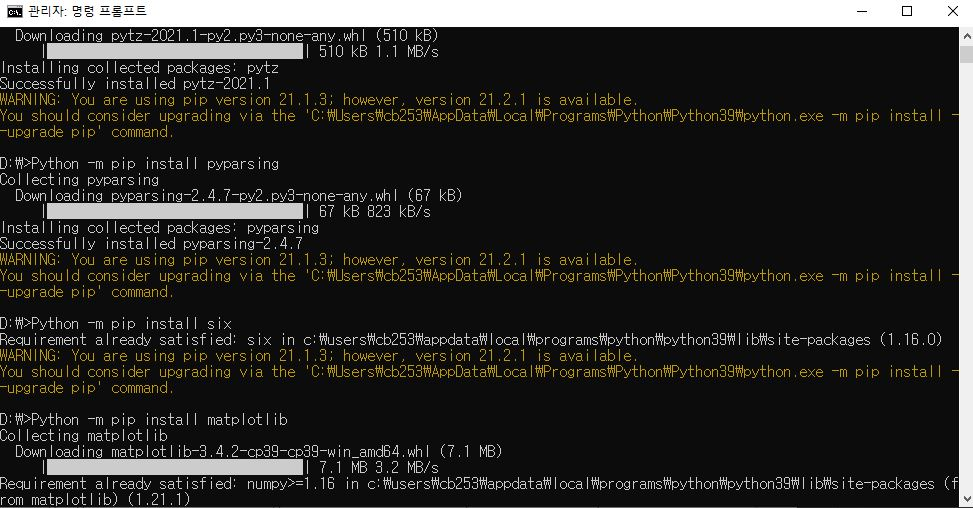







---

## [Practice Project: Extracting Data from an SVG File]

Our task for this week's practice project has three steps.
1. Parse the XML in the SVG file using an existing Python module and extract the d and id attributes for each county.
2. Extract the county's  boundary coordinates(as a list of map coordinates) from the path data for each county.
3. Compute the center of each county using our provided code and output a CSV file with FIPS codes and county centers.

### 1. Parse the XML in the given SVG file

In [3]:
PATH = '/content/drive/MyDrive/etc/'

In [10]:
"""
Week 2 practice project template for Python Data Visualization
Compute county centers from an SVG image of USA that includes county boundaries
Output a CSV file with FIPS code and county centers
"""

import math
import csv
import re


# Parse the XMLin USA SVG file extract county attributes
# Derive from example code - https://stackoverflow.com/questions/15857818/python-svg-parser

from xml.dom import minidom

def get_county_attributes(svg_file_name):
    """
    Given SVG file associate with string svg_file_name, extract county attributes from associated XML
    Return a list of tuples consisting of FIPS codes (strings) and county boundaries (strings)
    """
    doc = minidom.parse(PATH+"USA_Counties_2014.svg")
    return_list = [(path.getAttribute('id'), path.getAttribute('d')) for path in doc.getElementsByTagName('path')]
    doc.unlink()
    
    return return_list
                                          

def test_get_attributes(svg_file_name):
    """
    """
    county_attribute_list = get_county_attributes(svg_file_name)
    print(len(county_attribute_list))
    print(county_attribute_list[30])
    print()
    print(county_attribute_list[100])
    print()
    print(county_attribute_list[1000])
    
test_get_attributes(PATH+"USA_Counties_with_FIPS_and_names.svg")

# Output from tests
##3143
##('01045', 'M 405.63598,251.83 L 409.24698,251.415 L 409.67498,255.323 L 409.71998,255.692 L 409.02198,256.291 L 408.85498,256.306 L 408.35898,256.26 L 408.07398,256.183 L 407.69998,256.094 L 407.52498,256.085 L 407.33998,256.094 L 407.08298,256.179 L 407.02098,256.233 L 406.63198,257.211 L 405.74898,257.292 L 405.19098,251.879 L 405.63598,251.83')
##
##('05071', 'M 317.43698,203.82 L 319.27598,203.843 L 322.97698,204.189 L 322.99398,205.892 L 322.45798,206.989 L 321.89498,207.583 L 321.70498,207.588 L 321.72898,209.44 L 319.85398,208.364 L 319.41098,208.539 L 318.61698,208.792 L 317.41498,208.931 L 317.43698,203.82')
##
##('21119', 'M 425.90398,172.667 L 426.90998,172.816 L 427.64998,173.226 L 427.74298,173.371 L 427.79298,173.794 L 427.77098,174.145 L 427.95498,174.685 L 428.00898,174.74 L 428.23498,174.871 L 428.42898,174.957 L 428.23098,175.164 L 427.55398,175.394 L 426.85598,175.88 L 426.66598,176.124 L 426.46398,176.327 L 426.06698,176.642 L 425.84798,176.639 L 425.66498,176.512 L 424.04398,173.987 L 425.64298,172.487 L 425.90398,172.667')    



# Code to compute the center of a county from its boundary (as a string)

def get_boundary_coordinates(boundary_data):
    """
    Given the country boundary data as a string,
    Return the county boundary as a list of coordinates
    Ignores 'M', 'L, 'z'
    """

    split_text = re.split('\s?M |\s?L |\s?z ',boundary_data)
    filtered_list = list(filter(lambda x : x != '', split_text))
    return_list = []

    for item in filtered_list:
        split_list = item.split(',')
        return_list.append((float(split_list[0]), float(split_list[1])))

    return return_list


# Provided code to estimate a county center from a list of coordinates on county boundary

def dist(pt1, pt2):
    """
    Compute Euclidean distance between two points
    """
    return math.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

def compute_county_center(boundary_coordinates):
    """
    Given a list of coordinates (tuples of two floats) on the county boundary,
    Return an estimate of the center of the county as a tuple of two floats
    Assumes the list of coordinates forms a closed polygon with first and last point repeated
    """
    centroid = [0, 0]
    perimeter = 0
    for idx in range(len(boundary_coordinates) - 1):
        edge_length = dist(boundary_coordinates[idx], boundary_coordinates[idx + 1])
        centroid[0] += 0.5 * (boundary_coordinates[idx][0] + boundary_coordinates[idx + 1][0]) * edge_length
        centroid[1] += 0.5 * (boundary_coordinates[idx][1] + boundary_coordinates[idx + 1][1]) * edge_length
        perimeter += edge_length
    return [(centroid[0] / perimeter), (centroid[1] / perimeter)]


BOUNDARY_STRING1 = "M 412.47298,198.204 L 412.05498,198.597 L 411.68998,198.637 L 410.44998,197.371 L 409.73798,196.51 L 410.65298,195.31 L 412.14998,194.265 L 412.94598,194.016 L 413.28898,193.711 L 413.91998,193.075 L 414.86198,194.775 L 414.97098,194.936 L 414.77698,194.878 L 414.28998,195.071 L 412.64998,197.641 L 412.47298,198.204 z M 412.47298,198.204 L 412.47298,198.204"
BOUNDARY_STRING2 = "M 124.80274,305.35735 L 123.03975,304.03435 L 123.48174,303.37435 L 124.36175,303.59335 L 125.02275,304.03435 L 125.46275,305.13535 L 124.80274,305.35735 M 125.90375,309.76335 L 126.12375,309.98335 L 125.02275,310.64335 L 124.58274,309.32235 L 123.92075,308.66035 L 123.92075,309.10235 L 123.70075,309.10235 L 121.71875,308.66035 L 121.71875,308.88135 L 122.59975,308.88135 L 123.92075,309.32235 L 124.80274,310.64335 L 123.48174,311.96535 L 122.59975,311.52535 L 122.15875,311.52535 L 121.49775,311.30535 L 119.29575,310.42235 L 120.17675,309.54235 L 121.49775,307.55935 L 122.15875,307.33935 L 122.15875,306.89835 L 124.14175,306.89835 L 125.02275,307.55935 L 124.80274,308.66035 L 125.90375,308.88135 L 126.34474,309.32235 L 125.90375,309.76335 M 134.27575,313.50735 L 133.61475,313.50735 L 133.39675,313.94835 L 133.17575,312.84635 L 132.07475,311.74535 L 132.07475,311.30535 L 131.85275,310.64335 L 131.85275,310.42235 L 132.29375,308.88135 L 135.81775,311.74535 L 134.93875,311.96535 L 134.49675,312.62535 L 134.27575,313.50735 M 129.20874,310.42235 L 129.86974,309.98335 L 129.86974,310.20135 L 131.63375,311.96535 L 131.19175,311.96535 L 130.53075,311.08435 L 130.31075,311.30535 L 131.85275,312.84635 L 132.07475,313.28835 L 131.63375,313.94835 L 131.63375,314.60935 L 130.97074,315.70935 L 130.31075,314.83035 L 130.31075,313.50735 L 129.20874,312.62535 L 128.32674,310.86435 L 127.44574,309.76335 L 127.44574,309.54235 L 127.66674,309.54235 L 128.32674,310.20135 L 128.54674,310.86435 L 128.98874,310.86435 L 128.98874,310.64335 L 129.20874,310.42235 M 126.78574,312.62535 L 125.90375,312.40635 L 125.90375,313.28835 L 125.02275,313.50735 L 124.36175,313.28835 L 124.14175,312.62535 L 124.36175,311.52535 L 125.24275,311.30535 L 125.68474,310.86435 L 128.10674,311.30535 L 128.32674,311.74535 L 128.54674,312.40635 L 128.32674,312.62535 L 127.88674,312.84635 L 126.78574,312.62535"

def test_boundary_code():
    """
    Test out code for computing coordinates for county boundaries
    """
    boundary_coords1 = get_boundary_coordinates(BOUNDARY_STRING1)
    boundary_coords2 = get_boundary_coordinates(BOUNDARY_STRING2)
    print(boundary_coords1)
    print(boundary_coords2)
    print(compute_county_center(boundary_coords1))
    print(compute_county_center(boundary_coords2))

test_boundary_code()

# Output for testing code
##[(412.47298, 198.204), (412.05498, 198.597), (411.68998, 198.637), (410.44998, 197.371), (409.73798, 196.51), (410.65298, 195.31), (412.14998, 194.265), (412.94598, 194.016), (413.28898, 193.711), (413.91998, 193.075), (414.86198, 194.775), (414.97098, 194.936), (414.77698, 194.878), (414.28998, 195.071), (412.64998, 197.641), (412.47298, 198.204), (412.47298, 198.204), (412.47298, 198.204)]
##[(124.80274, 305.35735), (123.03975, 304.03435), (123.48174, 303.37435), (124.36175, 303.59335), (125.02275, 304.03435), (125.46275, 305.13535), (124.80274, 305.35735), (125.90375, 309.76335), (126.12375, 309.98335), (125.02275, 310.64335), (124.58274, 309.32235), (123.92075, 308.66035), (123.92075, 309.10235), (123.70075, 309.10235), (121.71875, 308.66035), (121.71875, 308.88135), (122.59975, 308.88135), (123.92075, 309.32235), (124.80274, 310.64335), (123.48174, 311.96535), (122.59975, 311.52535), (122.15875, 311.52535), (121.49775, 311.30535), (119.29575, 310.42235), (120.17675, 309.54235), (121.49775, 307.55935), (122.15875, 307.33935), (122.15875, 306.89835), (124.14175, 306.89835), (125.02275, 307.55935), (124.80274, 308.66035), (125.90375, 308.88135), (126.34474, 309.32235), (125.90375, 309.76335), (134.27575, 313.50735), (133.61475, 313.50735), (133.39675, 313.94835), (133.17575, 312.84635), (132.07475, 311.74535), (132.07475, 311.30535), (131.85275, 310.64335), (131.85275, 310.42235), (132.29375, 308.88135), (135.81775, 311.74535), (134.93875, 311.96535), (134.49675, 312.62535), (134.27575, 313.50735), (129.20874, 310.42235), (129.86974, 309.98335), (129.86974, 310.20135), (131.63375, 311.96535), (131.19175, 311.96535), (130.53075, 311.08435), (130.31075, 311.30535), (131.85275, 312.84635), (132.07475, 313.28835), (131.63375, 313.94835), (131.63375, 314.60935), (130.97074, 315.70935), (130.31075, 314.83035), (130.31075, 313.50735), (129.20874, 312.62535), (128.32674, 310.86435), (127.44574, 309.76335), (127.44574, 309.54235), (127.66674, 309.54235), (128.32674, 310.20135), (128.54674, 310.86435), (128.98874, 310.86435), (128.98874, 310.64335), (129.20874, 310.42235), (126.78574, 312.62535), (125.90375, 312.40635), (125.90375, 313.28835), (125.02275, 313.50735), (124.36175, 313.28835), (124.14175, 312.62535), (124.36175, 311.52535), (125.24275, 311.30535), (125.68474, 310.86435), (128.10674, 311.30535), (128.32674, 311.74535), (128.54674, 312.40635), (128.32674, 312.62535), (127.88674, 312.84635), (126.78574, 312.62535)]
##[412.4322758720973, 195.8063763549288]
##[127.67295507021686, 310.5353674642897]

                                            
# Put it all together to read county attributes from SVG files, compute county centers, write FIPS codes and county centers to CSV file

def process_county_attributes(svg_file_name, csv_file_name):
    """
    Given SVG file name (as string), extract county attributes (FIPS code and county boundaries)
    Then compute county centers and write a CSV file with columns corresponding to FIPS code, x-coord of centers, y-coord of centers 
    """

    # Extract county attibutes from SVG file
    attr_list = get_county_attributes(svg_file_name) # --> [(카운티, '좌표'), (....)]
    print("Processed", len(attr_list), "entries")

    # Ouput CSV file
    with open(csv_file_name, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter =',', quoting = csv.QUOTE_MINIMAL)
        for (fips, boundary) in attr_list:
            boundary_coordinates = get_boundary_coordinates(boundary)
            center = compute_county_center(boundary_coordinates)
            csv_writer.writerow([fips, center[0], center[1]])
    print("Wrote csv file", csv_file_name)
    
    
# Output CSV file should have 3143 rows
    
process_county_attributes(PATH+"USA_Counties_2014.svg", "USA_Counties_with_FIPS_and_centers.csv")                                  




                    



3143
('01045', 'M 405.63598,251.83 L 409.24698,251.415 L 409.67498,255.323 L 409.71998,255.692 L 409.02198,256.291 L 408.85498,256.306 L 408.35898,256.26 L 408.07398,256.183 L 407.69998,256.094 L 407.52498,256.085 L 407.33998,256.094 L 407.08298,256.179 L 407.02098,256.233 L 406.63198,257.211 L 405.74898,257.292 L 405.19098,251.879 L 405.63598,251.83')

('05071', 'M 317.43698,203.82 L 319.27598,203.843 L 322.97698,204.189 L 322.99398,205.892 L 322.45798,206.989 L 321.89498,207.583 L 321.70498,207.588 L 321.72898,209.44 L 319.85398,208.364 L 319.41098,208.539 L 318.61698,208.792 L 317.41498,208.931 L 317.43698,203.82')

('21119', 'M 425.90398,172.667 L 426.90998,172.816 L 427.64998,173.226 L 427.74298,173.371 L 427.79298,173.794 L 427.77098,174.145 L 427.95498,174.685 L 428.00898,174.74 L 428.23498,174.871 L 428.42898,174.957 L 428.23098,175.164 L 427.55398,175.394 L 426.85598,175.88 L 426.66598,176.124 L 426.46398,176.327 L 426.06698,176.642 L 425.84798,176.639 L 425.66498,176.512 L 42